In [1]:
# to read old Matlab format
#from scipy.io import loadmat    
#feature_onse_3s = loadmat('data/feature_onset_3s.mat')

In [32]:
# v73 format is loaded by h5py
import h5py
import numpy as np

featureFilename = "data/feature_onset_3s.mat"
with h5py.File(featureFilename,'r') as hf:
#    print('List of arrays in this file: \n', hf.keys())
    feature_cor = np.array(hf.get('WT_cor_onset_3s'))   #.transpose()   # DO NOT TRANSPOSE
    print('Shape of the array feature_cor = \n', feature_cor.shape)

    feature_incor = np.array(hf.get('WT_incor_onset_3s'))   # .transpose()   # DO NOT TRANSPOSE
    print('Shape of the array feature_incor = \n', feature_incor.shape)

    
#    data = hf.get('dataset_1')
#    np_data = np.array(data)
    

Shape of the array feature_cor = 
 (36, 1596)
Shape of the array feature_incor = 
 (8, 1596)


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# plt.subplot(121)
# plt.hist(feature_cor)
# plt.subplot(122)
# plt.hist(feature_incor)

(array([119., 150., 183., 146., 151., 155., 179., 158., 153., 202.]),
 array([0.00423202, 0.10380882, 0.20338561, 0.30296241, 0.40253921,
        0.50211601, 0.60169281, 0.70126961, 0.8008464 , 0.9004232 ,
        1.        ]),
 <a list of 10 Patch objects>)

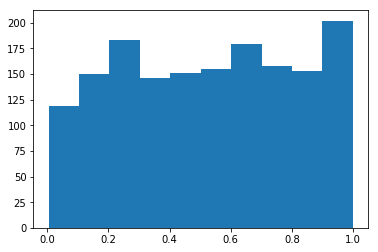

In [33]:
# Calculate the Wilcoxon signed-rank test.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html

from scipy.stats import ranksums

numTrialCor, dimFeature = feature_cor.shape
numTrialIncor, dimFeature = feature_incor.shape

# for each channel*freq
pVal = list()
for i in range(dimFeature):
    T, p = ranksums(feature_cor[:,i], feature_incor[:,i])
    pVal.append(p)
plt.hist(pVal)

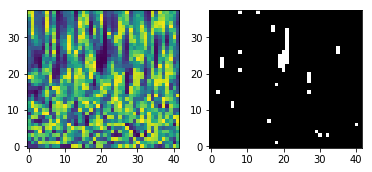

In [34]:
pVal2D = np.reshape(pVal, (38, 42))
idxSelectedFeature = pVal2D<0.05

plt.subplot(121)
plt.imshow(pVal2D)
plt.gca().invert_yaxis()
plt.subplot(122)
plt.imshow(idxSelectedFeature, cmap='gray')
plt.gca().invert_yaxis()

In [35]:
# print selected channels
Fs = [ 1,     2,     3,     4,     5,     6,     7,     8,     9,    10,    11,    12,    13,    15,
    17,    19,    21,    23,    25,    27,    29,    32,    36,    40,    44,    48,    52,    56,
    64,    68,    72,    76,    80,    84,    88,    92,    96,   100]
#plt.imshow(range(42),Fs, pVal2D)
listSelectedFeature = list()
for ch in range(42):
    for i in range(38):
        if pVal2D[i][ch] < 0.05: #idxSelectedFeature[i,ch]:
            print("ch={}, freq={}".format(ch+1,Fs[i]))
            listSelectedFeature.append((ch,i))
print(listSelectedFeature)
print(len(listSelectedFeature))

ch=3, freq=19
ch=4, freq=36
ch=4, freq=40
ch=4, freq=44
ch=7, freq=12
ch=7, freq=13
ch=9, freq=32
ch=9, freq=52
ch=9, freq=100
ch=14, freq=100
ch=17, freq=8
ch=18, freq=80
ch=18, freq=84
ch=19, freq=2
ch=19, freq=23
ch=20, freq=36
ch=20, freq=40
ch=20, freq=44
ch=20, freq=48
ch=21, freq=32
ch=21, freq=36
ch=21, freq=40
ch=21, freq=44
ch=21, freq=48
ch=21, freq=52
ch=22, freq=40
ch=22, freq=44
ch=22, freq=48
ch=22, freq=52
ch=22, freq=56
ch=22, freq=64
ch=22, freq=68
ch=22, freq=72
ch=22, freq=76
ch=22, freq=80
ch=28, freq=19
ch=28, freq=25
ch=28, freq=27
ch=28, freq=29
ch=30, freq=5
ch=31, freq=4
ch=33, freq=4
ch=36, freq=52
ch=36, freq=56
ch=41, freq=7
[(2, 15), (3, 22), (3, 23), (3, 24), (6, 11), (6, 12), (8, 21), (8, 26), (8, 37), (13, 37), (16, 7), (17, 32), (17, 33), (18, 1), (18, 17), (19, 22), (19, 23), (19, 24), (19, 25), (20, 21), (20, 22), (20, 23), (20, 24), (20, 25), (20, 26), (21, 23), (21, 24), (21, 25), (21, 26), (21, 27), (21, 28), (21, 29), (21, 30), (21, 31), (21, 32)

In [36]:
# Now, select features 
idx=np.array(pVal)<0.05
selected_feature_cor = feature_cor[:,idx]
selected_feature_incor = feature_incor[:,idx]

In [37]:
print(selected_feature_cor.shape)
print(selected_feature_incor.shape)

(36, 45)
(8, 45)


In [39]:
# let's standardize data
X = np.concatenate((selected_feature_cor, selected_feature_incor),axis=0)
Y = np.append(np.ones(numTrialCor),-np.ones(numTrialIncor))

from sklearn import preprocessing
# http://scikit-learn.org/stable/modules/preprocessing.html
X_scaled = preprocessing.scale(X)

print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[-2.56612913e-15 -3.98298917e-16 -1.56046262e-16  1.94289029e-15
  4.94553893e-16 -3.43759112e-15  2.78186565e-16  1.54926577e-15
 -2.24504758e-15  2.29614307e-15  6.09613370e-15  1.28180295e-15
 -7.21644966e-16  7.56970244e-15  1.66533454e-15 -9.61352210e-16
  4.78657518e-15 -2.19269047e-15 -1.44581317e-15  1.61581607e-15
  1.58963751e-15  8.45283439e-16 -1.05092702e-15  3.16823588e-16
 -1.36254644e-16  2.22296928e-15  1.31208176e-15 -1.80663565e-15
 -1.03452600e-16 -8.73039015e-16 -4.49135678e-16  3.17927503e-16
  1.23890797e-15  1.09003715e-15 -2.47276946e-15  7.03982327e-16
 -6.75595943e-16  1.78865761e-15 -4.51028104e-16  1.16384175e-15
 -4.18352222e-15  2.73045475e-15 -3.73438654e-16 -1.84779591e-15
  1.01055528e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


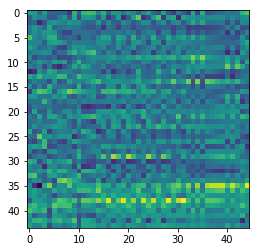

In [40]:
plt.imshow(X_scaled)

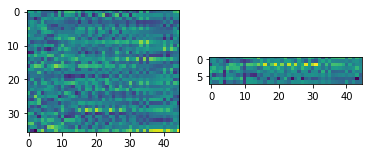

In [41]:
# compare mean
plt.subplot(121)
plt.imshow(X_scaled[Y>0,:])
plt.subplot(122)
plt.imshow(X_scaled[Y<0,:])

In [42]:
# save to a file
np.savetxt("X.txt",X_scaled)   # 44x45
np.savetxt("Y.txt", Y)         # 44x1